In [1]:
# import packages
import sgkit as sg
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import allel

In [2]:
ds = sg.load_dataset(f'/Users/christinagkertsou/Desktop/Finalyearproject/dataset/AgamP4_2L.zarr')

ds['sample_cohort'] = xr.DataArray([0] * 2 + [1] * 10 + [2] * 6, dims="samples")
ds['sample_cohort_name'] = xr.DataArray(['ara'] * 2 + ['gam'] * 10 + ['hyb_ctr'] + ['hyb'] * 5, dims="samples")
ds['sample_cohort_name']

sample_is_hyb = ds['sample_cohort_name'] == 'hyb'
sample_is_ara = ds['sample_cohort_name'] == 'ara'
sample_is_gam = ds['sample_cohort_name'] == 'gam'

g = allel.GenotypeArray(ds['call_genotype'])

In [3]:
g_is_called_ara_SNP=g[:,sample_is_ara].is_hom_ref().all(axis=1)
g_is_called_hyb_SNP=g[:,sample_is_hyb].is_hom_ref().all(axis=1) 
g_is_called_gam_SNP=g[:,sample_is_gam].is_hom_ref().all(axis=1) 

mask_ref=g_is_called_ara_SNP | g_is_called_hyb_SNP | g_is_called_gam_SNP

In [4]:
x = np.array(g)
x.shape

(1855171, 18, 2)

In [5]:
g_is_called_ara_SNP.shape

(1855171,)

In [6]:
np.array(sample_is_ara).shape

(18,)

In [7]:
is_ara_alt_hom_SNP=g[:,sample_is_ara].is_hom_alt().all(axis=1)
is_hyb_alt_hom_SNP=g[:,sample_is_hyb].is_hom_alt().all(axis=1)
is_gam_alt_hom_SNP=g[:,sample_is_gam].is_hom_alt().all(axis=1)

mask_alt=is_ara_alt_hom_SNP | is_hyb_alt_hom_SNP | is_gam_alt_hom_SNP

In [ ]:
# snp_pos [1, 2, 3, 4, 5, 6,]
# 
# snp_depth_samples [[10, 20, 30],
#                     [20, 20, 20],
#                       ...]
# 
# snp_pos[mask_pos]
# snp_depth_samples[mask_pos,mask_samples]

In [ ]:
is_dp_hyb_pos = dp_markers[:,sample_is_hyb].mean(axis=1) > 0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dp = ds['call_DP'].compute()

dp_markers = dp[is_ara_alt_hom_SNP,:]

# mask for hybrids
is_dp_hyb_pos = dp_markers[:,sample_is_hyb].mean(axis=1) > 0
dp_hyb = dp_markers[is_dp_hyb_pos&is_hyb_het_SNP,sample_is_hyb].mean(axis=1)

# mask for hybrids
is_dp_ara_pos = dp_markers[:,sample_is_ara].mean(axis=1) > 0
dp_ara = dp_markers[is_dp_ara_pos,sample_is_ara].mean(axis=1)

fig, ax = plt.subplots(figsize=(20, 5))

sns.distplot(np.log10(dp_hyb), ax=ax, label='hyb')
sns.distplot(np.log10(dp_ara), ax=ax, label='ara')

ax.legend()
# ax.set_xlim(0, 1500)


In [ ]:
#Alt_hom for ara, het for hyb, alt_hom for hyb

In [8]:
is_hyb_het_SNP=g[:,sample_is_hyb].is_het().all(axis=1)


/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

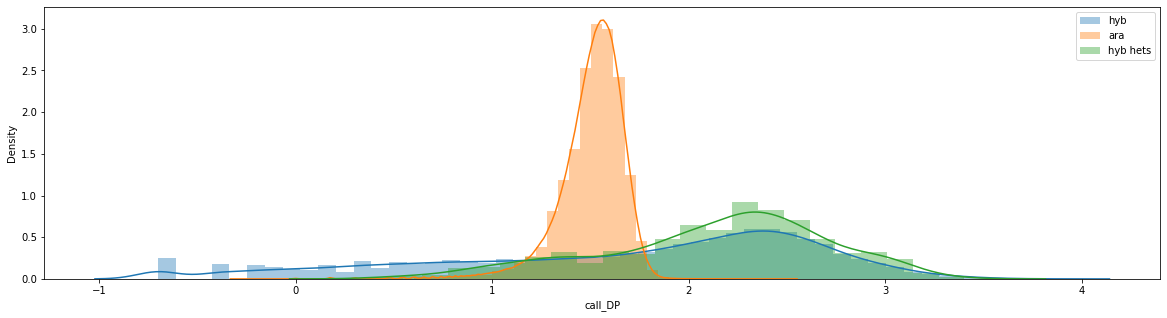

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

dp = ds['call_DP'].compute()

dp_markers = dp[is_ara_alt_hom_SNP,:]

# mask for hybrids
is_dp_hyb_pos = dp_markers[:,sample_is_hyb].mean(axis=1) > 0
dp_hyb = dp_markers[is_dp_hyb_pos,sample_is_hyb].mean(axis=1)

# mask for ara markers
is_dp_ara_pos = dp_markers[:,sample_is_ara].mean(axis=1) > 0
dp_ara = dp_markers[is_dp_ara_pos,sample_is_ara].mean(axis=1)

# mask for hybrids hets
g_hyb = g[:,sample_is_hyb]
is_hyb_het_SNP = g_hyb[is_ara_alt_hom_SNP,:].is_het().sum(axis=1) >= 3
dp_hyb_hets = dp_markers[is_hyb_het_SNP,sample_is_hyb].mean(axis=1)

fig, ax = plt.subplots(figsize=(20, 5))

sns.distplot(np.log10(dp_hyb), ax=ax, label='hyb')
sns.distplot(np.log10(dp_ara), ax=ax, label='ara')
sns.distplot(np.log10(dp_hyb_hets), ax=ax, label='hyb hets')

ax.legend()
# ax.set_xlim(0, 1500)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dp = ds['call_DP'].compute()

dp_markers = dp[is_ara_alt_hom_SNP,:]

# mask for hybrids
is_dp_hyb_pos = dp_markers[:,sample_is_hyb].mean(axis=1) > 0
dp_hyb = dp_markers[is_dp_hyb_pos,sample_is_hyb].mean(axis=1)

dp_hyb_het = dp_markers[is_dp_hyb_pos,sample_is_hyb].mean(axis=1)

# mask for hybrids
is_dp_ara_pos = dp_markers[:,sample_is_ara].mean(axis=1) > 0
dp_ara = dp_markers[is_dp_ara_pos,sample_is_ara].mean(axis=1)

dp_ara2=dp_markers_het[is_dp_ara_pos,sample_is_ara].mean(axis=1)


fig, ax = plt.subplots(figsize=(20, 5))

sns.distplot(np.log10(dp_hyb), ax=ax, label='hyb_alt_hom')
sns.distplot(np.log10(dp_ara), ax=ax, label='ara')
sns.distplot(np.log10(dp_ara), ax=ax, label='hyb_het')

ax.legend()

In [12]:
g_hyb = g[:,sample_is_hyb]

# 1) g_hyb are hets >=3 -> MASK 1

# 2) g_hyb on is_ara_alt_hom_SNP AND are hets >=3 -> MASK 2

# AD 1 = AD[MASK1]
# AD 2 = AD[MASK2]

# ratio_1 = AD[1] ref / alt 1



<GenotypeArray shape=(1855171, 18, 2) dtype=int8>
./. ./. 0/1 0/1 0/0 ... ./. ./. ./. ./. ./.
./. ./. 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
./. ./. 0/0 0/0 0/0 ... ./. ./. ./. ./. ./.
...
1/1 1/1 ./. ./. ./. ... ./. ./. ./. ./. ./.
1/1 1/1 ./. ./. ./. ... ./. ./. ./. ./. ./.
1/1 1/1 ./. ./. ./. ... ./. ./. ./. ./. ./.

In [54]:
#Start 
g_hyb=g[:,sample_is_hyb].is_het().sum(axis=1)>=3
g_hyb


array([False, False, False, ..., False, False, False])

In [ ]:
test_ara_pos=g_hyb[]

In [49]:
g_is_called_hyb_hets_test=g[g_hyb,:]
g_is_called_hyb_hets_test

<GenotypeArray shape=(4667, 18, 2) dtype=int8>
1/1 1/1 ./. ./. ./. ... 0/1 0/1 0/1 0/1 1/1
./. ./. ./. ./. ./. ... ./. 0/1 0/1 0/1 ./.
./. ./. ./. ./. ./. ... ./. 0/1 0/1 0/1 ./.
...
1/1 1/1 ./. ./. ./. ... 0/1 ./. 0/1 0/1 0/1
1/1 1/1 ./. ./. ./. ... 0/1 ./. 0/1 0/1 0/1
./. ./. ./. ./. ./. ... 0/1 0/1 0/1 0/1 ./.

In [21]:
#Mask1

g_is_called_hyb_hets=g_hyb.is_het().sum(axis=1) >=3
g_is_called_hyb_hets

array([False, False, False, ..., False, False, False])

In [42]:
g_is_called_hyb_hets_test=g_hyb[g_is_called_hyb_hets,:]
g_is_called_hyb_hets_test

<GenotypeArray shape=(4667, 5, 2) dtype=int8>
0/1 0/1 0/1 0/1 1/1
./. 0/1 0/1 0/1 ./.
./. 0/1 0/1 0/1 ./.
...
0/1 ./. 0/1 0/1 0/1
0/1 ./. 0/1 0/1 0/1
0/1 0/1 0/1 0/1 ./.

In [56]:
#Mask2
g_hyb_pos=g[is_ara_alt_hom_SNP,:]
g_hyb_pos

hybrids_select=g_hyb_pos[:,sample_is_hyb].is_het().sum(axis=1) >=3


In [43]:
#Mask2

g_hyb_pos=g_hyb[is_ara_alt_hom_SNP,:]
g_hyb_pos


mask2=g_hyb_pos & g_is_called_hyb_hets_test


ValueError: operands could not be broadcast together with shapes (977007,5,2) (4667,5,2) 

In [32]:
g_is_called_hyb_hets

array([False, False, False, ..., False, False, False])

In [58]:
ad=ds['call_AD'].compute()

ad_markers = ad[g_is_called_hyb_hets,sample_is_hyb]
ad_non_markers = ad[~g_is_called_hyb_hets,sample_is_hyb]
ad_markers


<xarray.DataArray 'call_AD' (variants: 4667, samples: 5, alleles: 4)>
array([[[        276,         281,          -2,          -2],
        [        176,         146,          -2,          -2],
        [        418,         486,          -2,          -2],
        [        398,         457,          -2,          -2],
        [          3,        1447,          -2,          -2]],

       [[         -1, -2147483647,          -2,          -2],
        [         20,          28,          -2,          -2],
        [          9,          34,          -2,          -2],
        [          8,          16,          -2,          -2],
        [         -1, -2147483647,          -2,          -2]],

       [[         -1, -2147483647,          -2,          -2],
        [         22,          40,          -2,          -2],
        [         14,          51,          -2,          -2],
        [         13,          31,          -2,          -2],
        [         -1, -2147483647,          -2,          -2]],

       ...,

       [[          1,           8,          -2,          -2],
        [         -1, -2147483647,          -2,          -2],
        [          2,           2,          -2,          -2],
        [          8,           6,          -2,          -2],
        [          2,          14,          -2,          -2]],

       [[          1,           8,          -2,          -2],
        [         -1, -2147483647,          -2,          -2],
        [          2,           2,          -2,          -2],
        [          8,           6,          -2,          -2],
        [          2,          14,          -2,          -2]],

       [[          5,           5,          -2,          -2],
        [          4,           2,          -2,          -2],
        [          1,           1,          -2,          -2],
        [          2,           3,          -2,          -2],
        [         -1, -2147483647,          -2,          -2]]],
      dtype=int32)
Dimensions without coordinates: variants, samples, alleles
Attributes:
    comment:  Allelic depths for the ref and alt alleles in the order listed

In [59]:
#Hets A ∩ B
all_hets=g[:,sample_is_hyb].is_het().sum(axis=1)>=3
sel_hets
ad_markers = ad[g_is_called_hyb_hets,sample_is_hyb]


In [60]:
print(all_hets.intersection(ad_markers))

AttributeError: 'numpy.ndarray' object has no attribute 'intersection'

In [64]:
np.intersect1d(all_hets, ad_markers, assume_unique=False, return_indices=False)

[0 1]


In [ ]:
ad_markers = ad[g_is_called_hyb_hets,sample_is_hyb]
ad_non_markers = ad[~g_is_called_hyb_hets,sample_is_hyb]
ad_markers



In [ ]:
ad=ds['call_AD'].compute()

ad_markers_2 = ad[g_is_called_hyb_hets,:]
ad_markers_2

In [14]:
is_ara_alt_hom_SNP.shape

ad[mask1,:]

(1855171,)

In [18]:
ad = ds['call_AD'].compute()
ad.shape

(1855171, 18, 4)

In [40]:
dp_ara.mean(), dp_hyb.mean()

(<xarray.DataArray 'call_DP' ()>
 array(33.96371443),
 <xarray.DataArray 'call_DP' ()>
 array(214.1516898))

In [9]:
G=ds["variant_DP"]
G

<xarray.DataArray 'variant_DP' (variants: 1855171)>
dask.array<open_dataset-e2a03f97ecb93fdd13340668ad7ff301variant_DP, shape=(1855171,), dtype=int32, chunksize=(10000,), chunktype=numpy.ndarray>
Dimensions without coordinates: variants
Attributes:
    comment:  Approximate read depth; some reads may have been filtered

In [19]:
ds['call_AD']

<xarray.DataArray 'call_AD' (variants: 1855171, samples: 18, alleles: 4)>
dask.array<open_dataset-e2a03f97ecb93fdd13340668ad7ff301call_AD, shape=(1855171, 18, 4), dtype=int32, chunksize=(10000, 18, 4), chunktype=numpy.ndarray>
Dimensions without coordinates: variants, samples, alleles
Attributes:
    comment:  Allelic depths for the ref and alt alleles in the order listed

In [20]:
ds

<xarray.Dataset>
Dimensions:               (variants: 1855171, samples: 18, alleles: 4,
                           ploidy: 2, alt_alleles: 3)
Dimensions without coordinates: variants, samples, alleles, ploidy, alt_alleles
Data variables: (12/17)
    call_AD               (variants, samples, alleles) int32 dask.array<chunksize=(10000, 18, 4), meta=np.ndarray>
    call_DP               (variants, samples) int32 dask.array<chunksize=(10000, 18), meta=np.ndarray>
    call_GQ               (variants, samples) int32 dask.array<chunksize=(10000, 18), meta=np.ndarray>
    call_genotype         (variants, samples, ploidy) int8 dask.array<chunksize=(10000, 18, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool dask.array<chunksize=(10000, 18, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool dask.array<chunksize=(10000, 18), meta=np.ndarray>
    ...                    ...
    variant_contig        (variants) int8 dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id            (variants) object dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_id_mask       (variants) bool dask.array<chunksize=(10000,), meta=np.ndarray>
    variant_position      (variants) int32 dask.array<chunksize=(10000,), meta=np.ndarray>
    sample_cohort         (samples) int64 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
    sample_cohort_name    (samples) <U7 'ara' 'ara' 'gam' ... 'hyb' 'hyb' 'hyb'
Attributes:
    contigs:               ['AgamP4_2L', 'AgamP4_2R', 'AgamP4_3L', 'AgamP4_3R...
    max_alt_alleles_seen:  4
    source:                sgkit-0.4.0

In [15]:
ds['variant_DP'].compute()

<xarray.DataArray 'variant_DP' (variants: 1855171)>
array([63, 37, 36, ..., 43, 41, 49], dtype=int32)
Dimensions without coordinates: variants
Attributes:
    comment:  Approximate read depth; some reads may have been filtered

In [17]:
DP_ref = mask1['variant_DP']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 5))

plot_tel=sns.barplot(, ax=ax, color="black")
ax.locator_params(axis="x", tight=None, nbins=15)
plot_2Ln.set(xlabel=("Variant position (bp)"), ylabel=("SNP density"), title=("SNP density of AgamP4_2L"))

/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


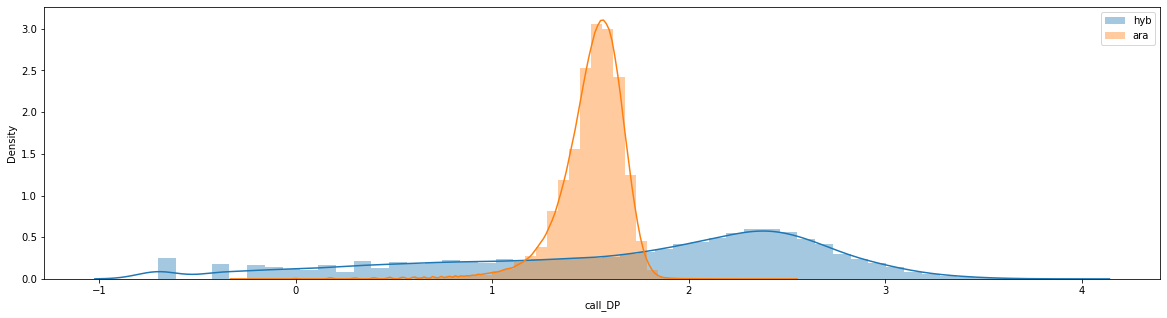

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

dp = ds['call_DP'].compute()

dp_markers = dp[is_ara_alt_hom_SNP,:]

# mask for hybrids
is_dp_hyb_pos = dp_markers[:,sample_is_hyb].mean(axis=1) > 0
dp_hyb = dp_markers[is_dp_hyb_pos,sample_is_hyb].mean(axis=1)

# mask for hybrids
is_dp_ara_pos = dp_markers[:,sample_is_ara].mean(axis=1) > 0
dp_ara = dp_markers[is_dp_ara_pos,sample_is_ara].mean(axis=1)

fig, ax = plt.subplots(figsize=(20, 5))

sns.distplot(np.log10(dp_hyb), ax=ax, label='hyb')
sns.distplot(np.log10(dp_ara), ax=ax, label='ara')

ax.legend()
# ax.set_xlim(0, 1500)

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

dp = ds['call_DP'].compute()

dp_markers = dp[is_ara_alt_hom_SNP,:]

# mask for hybrids
is_dp_hyb_pos = dp_markers[:,sample_is_hyb].mean(axis=1) > 0
dp_hyb = dp_markers[is_dp_hyb_pos,sample_is_hyb].mean(axis=1)
dp_hyb_het = dp_markers[is_hyb_het_SNP,sample_is_hyb].mean(axis=1)

# mask for hybrids
is_dp_ara_pos = dp_markers[:,sample_is_ara].mean(axis=1) > 0
dp_ara = dp_markers[is_dp_ara_pos,sample_is_ara].mean(axis=1)

fig, ax = plt.subplots(figsize=(20, 5))

sns.distplot(np.log10(dp_hyb), ax=ax, label='hyb')
sns.distplot(np.log10(dp_ara), ax=ax, label='ara')

ax.legend()
# ax.set_xlim(0, 1500)

IndexError: Boolean array size 1855171 is used to index array with shape (977007, 18).

In [173]:
g_hyb_het_all=g[:,sample_is_hyb].is_het().sum(axis=1) >=3
g_hyb_het_all=g[:,sample_is_hyb].is_het().sum(axis=1) >= 4

In [174]:
g_hyb_het_all.sum()

1538

In [175]:
g_ara = g[:,sample_is_ara]
g_hyb = g[:,sample_is_hyb]

ad_ara = ad[:,sample_is_ara]
ad_hyb = ad[:,sample_is_hyb]

In [176]:

mask_het_marker = g_hyb_het_all & g_ara.is_hom_alt().all(axis=1)
mask_het_non_marker = g_hyb_het_all & ~g_ara.is_hom_alt().all(axis=1)

g_het_markers = g_hyb[mask_het_marker,:]
g_het_non_markers = g_hyb[mask_het_non_marker,:]


In [177]:
ad_hyb_hets = ad_hyb[g_hyb.is_het().all(axis=1),:]

ad_hyb_marker = ad_hyb[mask_het_marker,:]
ad_hyb_non_marker = ad_hyb[mask_het_non_marker,:]

In [178]:
ad_hyb_marker.shape

(288, 5, 4)

In [179]:
ad_hyb_hets_all = np.array(ad_hyb_hets).reshape(-1, 4)

ad_hyb_marker_all = np.array(ad_hyb_marker).reshape(-1, 4)
ad_hyb_non_marker_all = np.array(ad_hyb_non_marker).reshape(-1, 4)

In [180]:
mask_marker_calls = ad_hyb_marker_all.sum(axis=1) > 0
mask_non_marker_calls = ad_hyb_non_marker_all.sum(axis=1) > 0

In [181]:
ad_hyb_m_clean = ad_hyb_marker_all[mask_marker_calls]
ad_hyb_nm_clean = ad_hyb_non_marker_all[mask_non_marker_calls]

In [182]:
ratios_hets = ad_hyb_hets_all[:,1] / ad_hyb_hets_all[:,:2].sum(axis=1)

ratios_markers = ad_hyb_m_clean[:,1] / ad_hyb_m_clean[:,:2].sum(axis=1)
ratios_non_markers = ad_hyb_nm_clean[:,1] / ad_hyb_nm_clean[:,:2].sum(axis=1)

/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/hybrids/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

(0.0, 1.5)

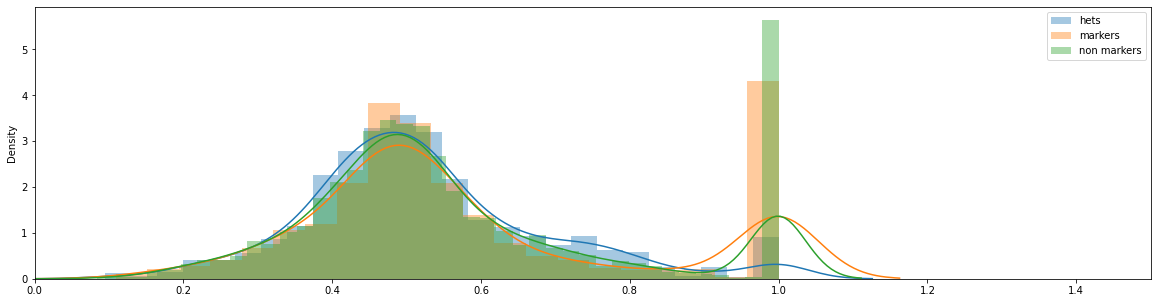

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

sns.distplot(ratios_hets, ax=ax, label='hets')
sns.distplot(ratios_markers, ax=ax, label='markers')
sns.distplot(ratios_non_markers, ax=ax, label='non markers')

ax.legend()
ax.set_xlim(0,1.5)

In [125]:
ratios_markers

array([1.01811594, 0.82954545, 1.16267943, ..., 8.        , 0.75      ,
       7.        ])